In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("../../data/bertopic.csv")
df.drop(['topic'], axis=1, inplace=True)
topic_inf = pd.read_csv("../../data/topics.csv")

In [16]:
df.head(4)

,date,media_outlet,url,title,text,content,comuna,date_clustering,tokens,doc,topics
0,2021-10-01,elheraldoaustral,https://www.eha.cl/noticia/local/reconocen-a-g...,Reconocen a guardaparques de la Región de Los ...,Distintos protagonistas de los parques naciona...,reconocen guardaparques región lagos actores c...,"['puyehue', 'chaiten']",2021-10,"['reconocen', 'guardaparques', 'region', 'lago...",reconocen guardaparques region lagos actores c...,-1
1,2021-10-01,elheraldoaustral,https://www.eha.cl/noticia/local/con-nuevos-ma...,Con nuevos materiales comienza plan piloto en ...,Centro de negocios Sercotec coordina acuerdos ...,nuevos materiales comienza plan piloto saltos ...,['puerto varas'],2021-10,"['nuevos', 'materiales', 'comienza', 'plan', '...",nuevos materiales comienza plan piloto saltos ...,-1
2,2021-10-01,elheraldoaustral,https://www.eha.cl/noticia/local/centro-de-sal...,Centro de Salud Familiar CESFAM Puerto Varas i...,Las horas se solicitan en el SOME o bien a tra...,centro salud familiar cesfam puerto varas invi...,['puerto varas'],2021-10,"['centro', 'salud', 'familiar', 'cesfam', 'pue...",centro salud familiar cesfam puerto vara invit...,2
3,2021-10-01,elheraldoaustral,https://www.eha.cl/noticia/local/alcalde-tomas...,Alcalde Tomás Gárate presidió por primera vez ...,Los y las consejeras destacaron el hecho de vo...,alcalde tomás gárate presidió primera vez octa...,"['castro', 'puerto varas']",2021-10,"['alcalde', 'tomas', 'garate', 'presidio', 'pr...",alcalde tomas garate presidio primera vez octa...,-1


In [17]:
topic_inf

,name,info
0,-1_puerto_persona_ano,"[('puerto', 0.0021238567295842445), ('persona'..."
1,0_musica_disco_artista,"[('musica', 0.007218779182036601), ('disco', 0..."
2,1_municipio_alcalde_municipal,"[('municipio', 0.006141231467361879), ('alcald..."
3,2_hospital_salud_atencion,"[('hospital', 0.018575830207523587), ('salud',..."
4,3_accidente_conductor_vehiculo,"[('accidente', 0.03223415814917446), ('conduct..."
...,...,...
366,365_militares_oficiales_mpsr,"[('militares', 0.03902888428945069), ('oficial..."
367,366_guillotinen_entrenador_anfp,"[('guillotinen', 0.03539148583227796), ('entre..."
368,367_hidrica_consultivo_mejoramiento,"[('hidrica', 0.04844971574631921), ('consultiv..."
369,368_silvestre_fauna_loros,"[('silvestre', 0.03780498984330248), ('fauna',..."


array([[<AxesSubplot:title={'center':'topic'}>]], dtype=object)

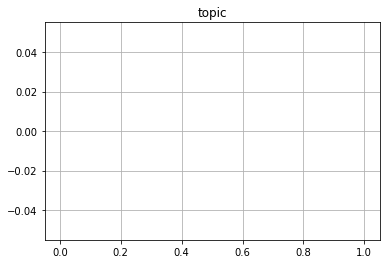

In [12]:
df.hist(column='topic')
